# CNN for Fashion-MNIST dataset

### Model 1 - Homemade Shallow Net

As we saw, we can get good precision by training our 'homemade shallow net' model relatively fast. Here we will train it in 20 epochs (which will take less than 20 minutes) in order to save the model and reuse it later for object detection program. 

### Loading and preparing the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

from random import randrange
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the train and the test set
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)


In [3]:
#Adding the fourth axis
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)

In [4]:
#Scaling the values to [0,1] range
X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train = X_train/255
X_test = X_test/255

In [5]:
#Encoding the classes
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Building the CNN

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from keras.optimizers import nadam
from keras.regularizers import l2

In [7]:
cnn = Sequential()

cnn.add(Conv2D(input_shape = (28, 28, 1), filters = 32, 
              kernel_size = (3,3), activation = 'relu', 
              padding='same', kernel_regularizer=l2(1e-4)))
cnn.add(MaxPool2D((2,2)))

cnn.add(Conv2D(filters = 32, 
              kernel_size = (3,3), activation = 'relu', 
              padding='same', kernel_regularizer=l2(1e-4)))
cnn.add(MaxPool2D((2,2)))


cnn.add(Flatten())

cnn.add(Dense(units = 256, activation='relu', 
              kernel_regularizer=l2(1e-4)))
cnn.add(Dropout(0.35))
cnn.add(Dense(units = 10, activation = 'softmax'))

In [8]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               401664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [9]:
cnn.compile(loss = 'categorical_crossentropy', 
           optimizer = nadam(lr = 0.001),
           metrics = ['accuracy'])

In [10]:
history = cnn.fit(X_train, y_train, batch_size = 256, epochs = 20, 
        shuffle = True, validation_data= (X_test, y_test), 
        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 699us/step - loss: 0.6485 - accuracy: 0.7832 - val_loss: 0.5335 - val_accuracy: 0.8192
Epoch 2/20
60000/60000 [==============================] - 41s 690us/step - loss: 0.4108 - accuracy: 0.8695 - val_loss: 0.3905 - val_accuracy: 0.8787
Epoch 3/20
60000/60000 [==============================] - 41s 678us/step - loss: 0.3609 - accuracy: 0.8878 - val_loss: 0.3775 - val_accuracy: 0.8826
Epoch 4/20
60000/60000 [==============================] - 41s 685us/step - loss: 0.3326 - accuracy: 0.8961 - val_loss: 0.3416 - val_accuracy: 0.8929
Epoch 5/20
60000/60000 [==============================] - 41s 682us/step - loss: 0.3115 - accuracy: 0.9042 - val_loss: 0.3346 - val_accuracy: 0.8959
Epoch 6/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.2965 - accuracy: 0.9088 - val_loss: 0.3231 - val_accuracy: 0.8991
Epoch 7/20
60000/60000 [==============================] 

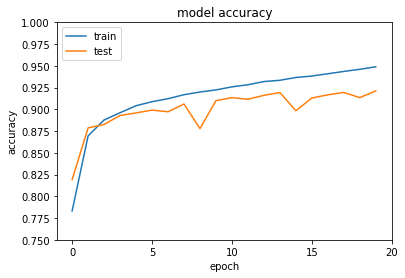

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(0,21,5))
plt.ylim(0.75,1), plt.yticks(np.arange(0.75,1.025,0.025))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model

In the last epoch our model showed 94.9% accuracy on the test set, and 92.1% accuracy on a training set. We will now save the model for later use. 

In [13]:
cnn.save('hm_shallow_net.h5py')